In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels import regression
from scipy.optimize import minimize

In [2]:
#importo insumos de precios y limpio nombre de columnas
market = pd.read_excel("Prueba.xlsx", index_col=0)
market.columns =[c.replace(" MF Equity","").replace(" INDEX","") for c in market.columns]
market.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [39]:
market.columns

Index(['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC*',
       'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA*', 'ORBIA*',
       'PE&OLES*', 'GRUMAB', 'RA', 'WALMEX*', 'BOLSAA', 'LIVEPOLC', 'GENTERA*',
       'IENOVA*', 'CUERVO*', 'ELEKTRA*', 'BBAJIOO', 'ALPEKA', 'MEGACPO',
       'GCC*', 'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA*', 'MEXBOL'],
      dtype='object')

In [3]:
#genero matriz de rendimientos
rets = market.pct_change().dropna(axis=0)
rets.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2017-06-08,0.021310,-0.006157,0.015489,-0.010401,-0.013458,-0.008074,-0.042311,0.006852,-0.011419,-0.001199,...,-0.002221,0.004935,0.001732,-0.005342,0.008094,-0.007527,0.010765,-0.010177,-0.003959,-0.003805
2017-06-09,-0.009016,-0.010074,0.025015,0.007274,-0.003226,-0.006642,-0.005936,-0.008082,-0.010631,0.000100,...,0.000974,0.007143,-0.009726,0.006167,-0.012999,-0.002830,-0.004774,-0.002056,-0.004337,-0.000117
2017-06-12,0.018196,0.017088,0.002381,-0.018617,0.012391,-0.000656,0.001361,-0.011578,-0.004414,-0.001701,...,0.007228,-0.002660,0.024007,-0.013049,0.005939,0.007492,0.004797,0.008831,0.006326,0.000958
2017-06-13,-0.012254,0.019637,-0.006532,0.006407,0.007581,-0.016006,0.017286,-0.003905,-0.000292,0.013226,...,0.000552,-0.002222,-0.016837,-0.000200,-0.006546,0.003718,-0.005141,0.018675,0.020146,-0.002075
2017-06-14,0.013699,0.014903,0.000000,0.010676,0.001904,0.001133,-0.007568,0.001307,0.002918,0.024426,...,0.003862,-0.000668,0.013657,0.003005,0.012791,-0.001010,0.001477,0.006875,0.018132,0.005389


In [40]:
#selecciono 7 acciones
rends = rets.copy().drop(['LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA*', 'ORBIA*',
       'PE&OLES*', 'GRUMAB', 'RA', 'WALMEX*', 'BOLSAA', 'LIVEPOLC', 'GENTERA*',
       'IENOVA*', 'CUERVO*', 'ELEKTRA*', 'BBAJIOO', 'ALPEKA', 'MEGACPO',
       'GCC*', 'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA*', 'MEXBOL'], axis=1)

rends.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*
DATE,,,,,,,
2017-06-08,0.021310,-0.006157,0.015489,-0.010401,-0.013458,-0.008074,-0.042311
2017-06-09,-0.009016,-0.010074,0.025015,0.007274,-0.003226,-0.006642,-0.005936
2017-06-12,0.018196,0.017088,0.002381,-0.018617,0.012391,-0.000656,0.001361
2017-06-13,-0.012254,0.019637,-0.006532,0.006407,0.007581,-0.016006,0.017286
2017-06-14,0.013699,0.014903,0.000000,0.010676,0.001904,0.001133,-0.007568


In [41]:
#Calculamos de rendimientos (rendimientos promedio contantes)
rend_rpc_diario = rends.mean()  #diario
rend_rpc_anual = rends.mean()*252  #anual

1- Rendimiento promedio constante diario y anual

In [43]:
print("rendimiento diario")
print(rend_rpc_diario)
print(" ")
print("rendimiento anual")
print(rend_rpc_anual)

rendimiento diario
KIMBERA     0.000128
GAPB        0.000421
CEMEXCPO   -0.001033
ASURB       0.000102
GFNORTEO    0.000193
KOFUBL     -0.000349
AC*        -0.000376
dtype: float64
 
rendimiento anual
KIMBERA     0.032192
GAPB        0.105969
CEMEXCPO   -0.260338
ASURB       0.025599
GFNORTEO    0.048631
KOFUBL     -0.087839
AC*        -0.094801
dtype: float64


Rendimientos con CAPM

In [44]:
#se extrae la informacion del Rm (rendimiento de mercado, en este caso IPC=MEXBOL)
indice = rets[['MEXBOL']]
indice.head()

,MEXBOL
DATE,
2017-06-08,-0.003805
2017-06-09,-0.000117
2017-06-12,0.000958
2017-06-13,-0.002075
2017-06-14,0.005389


In [45]:
#obtengo el rendimiento de mercado, es decir, del ipc
rend_ipc_diario = indice.mean()  #rendimiento diario
rend_ipc_diario

MEXBOL   -0.000111
dtype: float64

In [46]:
#calculo la varianza del ipc (volatilidad)
var_ipc_diario = indice.var()  #varianza diaria
var_ipc_diario

MEXBOL    0.000073
dtype: float64

In [48]:
#genero una nueva base con el MEXBOL
data_capm = rets.copy().drop(['LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA*', 'ORBIA*',
       'PE&OLES*', 'GRUMAB', 'RA', 'WALMEX*', 'BOLSAA', 'LIVEPOLC', 'GENTERA*',
       'IENOVA*', 'CUERVO*', 'ELEKTRA*', 'BBAJIOO', 'ALPEKA', 'MEGACPO',
       'GCC*', 'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA*'], axis=1)

data_capm.head()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,MEXBOL
DATE,,,,,,,,
2017-06-08,0.021310,-0.006157,0.015489,-0.010401,-0.013458,-0.008074,-0.042311,-0.003805
2017-06-09,-0.009016,-0.010074,0.025015,0.007274,-0.003226,-0.006642,-0.005936,-0.000117
2017-06-12,0.018196,0.017088,0.002381,-0.018617,0.012391,-0.000656,0.001361,0.000958
2017-06-13,-0.012254,0.019637,-0.006532,0.006407,0.007581,-0.016006,0.017286,-0.002075
2017-06-14,0.013699,0.014903,0.000000,0.010676,0.001904,0.001133,-0.007568,0.005389


In [51]:
#calculo la matriz de varaizna convarianza incluyendo mexbol
var_capm =data_capm.cov()
var_capm

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,MEXBOL
KIMBERA,0.000251,0.000049,0.000082,0.000053,0.000070,0.000048,0.000046,0.000061
GAPB,0.000049,0.000238,0.000067,0.000138,0.000105,0.000043,0.000045,0.000068
CEMEXCPO,0.000082,0.000067,0.000339,0.000084,0.000127,0.000058,0.000041,0.000094
ASURB,0.000053,0.000138,0.000084,0.000229,0.000095,0.000048,0.000038,0.000069
GFNORTEO,0.000070,0.000105,0.000127,0.000095,0.000381,0.000050,0.000046,0.000117
KOFUBL,0.000048,0.000043,0.000058,0.000048,0.000050,0.000150,0.000044,0.000052
AC*,0.000046,0.000045,0.000041,0.000038,0.000046,0.000044,0.000144,0.000042
MEXBOL,0.000061,0.000068,0.000094,0.000069,0.000117,0.000052,0.000042,0.000073


In [52]:
#calculo de betas usando metodo de varianza-covarianza
betas =[]
for i in range(8-1):
    beta= var_capm.iloc[i,7]/var_capm.iloc[7,7]
    betas.append(beta)
    print(data_capm.columns[i])
    print(betas[i])

KIMBERA
0.8342512940948715
GAPB
0.9370847557276849
CEMEXCPO
1.2936222822706345
ASURB
0.9424661448883279
GFNORTEO
1.5956398931437563
KOFUBL
0.716950374449028
AC*
0.5685905783295562


In [53]:
#calculando el rendimimento esperado diario de cada accion con CAPM
rf=.05
pm = .10
rendimientos = []
for i in range(7):
    rn= (rf/252)+(betas[i]*(pm/252))  #divido entre 252 ya que suponemos que las tasas estan anualizadas
    rendimientos.append(rn)
    print(rends.columns[i])
    print(rendimientos[i])

KIMBERA
0.0005294647992439966
GAPB
0.000570271728463367
CEMEXCPO
0.0007117548739169184
ASURB
0.0005724072003525111
GFNORTEO
0.0008316031321999034
KOFUBL
0.00048291681525755077
AC*
0.0004240438802895064


In [54]:
#calculando el rendimimento esperado anual de cada accion con CAPM
rendimientos_anuales = []
for i in range(7):
    rendimientos_anuales.append(rendimientos[i]*252)
    print(rends.columns[i])
    print(rendimientos_anuales[i])

KIMBERA
0.13342512940948714
GAPB
0.14370847557276847
CEMEXCPO
0.17936222822706344
ASURB
0.1442466144888328
GFNORTEO
0.20956398931437564
KOFUBL
0.12169503744490279
AC*
0.10685905783295561


In [55]:
resumen = pd.DataFrame(zip(list(rends.columns.values),rendimientos),
                                  columns =['Emisora','Rendimiento diario'])

resumen

,Emisora,Rendimiento diario
0,KIMBERA,0.000529
1,GAPB,0.000570
2,CEMEXCPO,0.000712
3,ASURB,0.000572
4,GFNORTEO,0.000832
5,KOFUBL,0.000483
6,AC*,0.000424


2- Matriz de Varianza Covarianza

In [56]:
rends.cov()

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*
KIMBERA,0.000251,0.000049,0.000082,0.000053,0.000070,0.000048,0.000046
GAPB,0.000049,0.000238,0.000067,0.000138,0.000105,0.000043,0.000045
CEMEXCPO,0.000082,0.000067,0.000339,0.000084,0.000127,0.000058,0.000041
ASURB,0.000053,0.000138,0.000084,0.000229,0.000095,0.000048,0.000038
GFNORTEO,0.000070,0.000105,0.000127,0.000095,0.000381,0.000050,0.000046
KOFUBL,0.000048,0.000043,0.000058,0.000048,0.000050,0.000150,0.000044
AC*,0.000046,0.000045,0.000041,0.000038,0.000046,0.000044,0.000144


3- Frontera de carteras de mínima varianza y frontera eficiente

In [57]:
#defino funcion para obtener el rendimiento y la volatilidad del portafolio
rend_diario = resumen['Rendimiento diario']

def port_rend(weights, r):
    E_p = (rend_diario @ weights).sum() * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [58]:
#simulo los pesos
weights_sim = np.random.random((5000, 7))
weights_sim = weights_sim / weights_sim.sum(axis=1, keepdims=True)

rend_sim = np.apply_along_axis(port_rend, 1, weights_sim, r=rends)
vol_sim = np.apply_along_axis(port_vol, 1, weights_sim, r=rends)

In [59]:
rend_sim

array([0.15298633, 0.14569272, 0.15509283, ..., 0.15009577, 0.15979456,
       0.15406481])

In [60]:
vol_sim

array([0.15917071, 0.15657707, 0.16133635, ..., 0.16133788, 0.17919476,
       0.15818545])

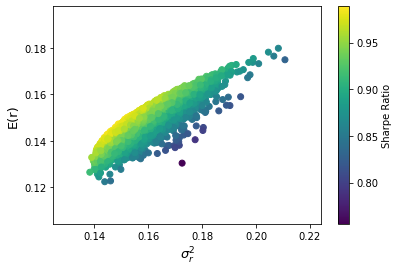

In [61]:
sharpe_ratio = rend_sim / vol_sim  #calculo el sharpe ratio para cada simulacion
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [62]:
N, M = rends.shape
w0  = np.random.randn(M)

def sum_weights(weights):
    return weights.sum() - 1 # == 0

def rend_esperado(w, E):
    return port_rend(w, rends) - E # == 0


constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=rends)
port0

     fun: 0.1379322414763654
     jac: array([0.13800008, 0.13777332, 0.13797241, 0.1381573 , 0.13748623,
       0.13804928, 0.13781453])
 message: 'Optimization terminated successfully.'
    nfev: 110
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.12322853, 0.09302021, 0.04983473, 0.10356197, 0.03196092,
       0.28033126, 0.31806238])

In [63]:
wp0 = port0.x
port_rend(wp0,rends),port_vol(wp0,rends)

(0.12848713377797752, 0.1379322414763654)

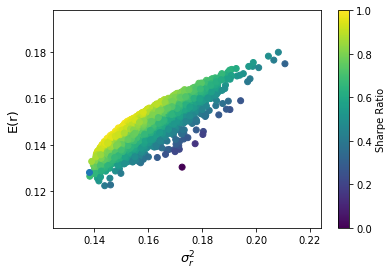

In [64]:
sharpe_ratio = rend_sim / vol_sim
plt.scatter(vol_sim, rend_sim, c=sharpe_ratio)
plt.scatter(port_vol(wp0, rends), port_rend(wp0, rends))
plt.colorbar(label="Sharpe Ratio")
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)", fontsize=13);

In [65]:
#defino los limites de la frontera
rmin = port_rend(wp0,rends)
rmax = rend_sim.max()
rend_maxs = np.linspace(rmin,rmax)
rend_maxs

array([0.12848713, 0.12953495, 0.13058277, 0.13163059, 0.1326784 ,
       0.13372622, 0.13477404, 0.13582186, 0.13686967, 0.13791749,
       0.13896531, 0.14001312, 0.14106094, 0.14210876, 0.14315658,
       0.14420439, 0.14525221, 0.14630003, 0.14734785, 0.14839566,
       0.14944348, 0.1504913 , 0.15153912, 0.15258693, 0.15363475,
       0.15468257, 0.15573038, 0.1567782 , 0.15782602, 0.15887384,
       0.15992165, 0.16096947, 0.16201729, 0.16306511, 0.16411292,
       0.16516074, 0.16620856, 0.16725638, 0.16830419, 0.16935201,
       0.17039983, 0.17144764, 0.17249546, 0.17354328, 0.1745911 ,
       0.17563891, 0.17668673, 0.17773455, 0.17878237, 0.17983018])

In [66]:
#genero la frontera eficiente
pesos_optimos = []
N, M = rends.shape
w_opt = np.random.randn(M)

for e in rend_maxs:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w_opt: rend_esperado(w_opt,e)},
    ]

    
    port_opt = minimize(port_vol, w_opt,  constraints = constraints, args=rends)
    w_opt = port_opt.x
    pesos_optimos.append(w_opt)

In [67]:
print(w_opt)
print(w_opt.sum())  #compruebo que la suma sea 1

[ 0.08489345  0.0928329   0.25961159  0.09234819  0.42154299  0.11627956
 -0.06750868]
1.0


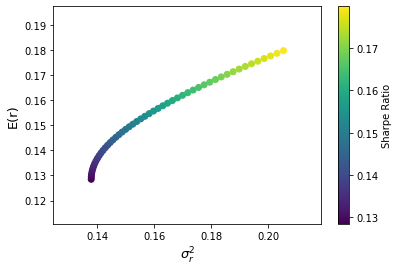

In [68]:
r_opt = []
v_opt = []

for w in pesos_optimos:
    r_opt.append(port_rend(w, rends))
    v_opt.append(port_vol(w, rends))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c=r_opt)
plt.colorbar(label="Sharpe Ratio",)
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13);

4- Portafolio riesgoso óptimo (maximiza el coeficiente de Sharpe)

In [69]:
A=3
def min_func_sharpe(weights):
    return - (port_rend(weights, rends) - rf) / port_vol(weights, rends)

constraints_sharpe = [
    {"type": "eq", "fun": sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints_sharpe)
w_sharpe = f_sharpe.x
w_sharpe

array([0.10329284, 0.09420527, 0.16239241, 0.09639256, 0.24149038,
       0.19291699, 0.10930955])

In [70]:
w_sharpe.sum()  #compruebo la suma

0.9999999999999998

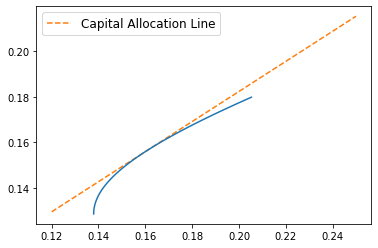

In [71]:
e_sharpe = port_rend(w_sharpe, rends)
vol_sharpe = port_vol(w_sharpe, rends)

sigma_c =  np.linspace(.12, 0.25)
sharpe = (rf) + sigma_c * (e_sharpe - (rf)) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

In [72]:
print(e_sharpe)
print(vol_sharpe)

0.15611676448345138
0.16034791381709262


5- Elige los porcentajes a invertir en el portafolio riesgoso óptimo y el activo libre de riesgo

In [73]:
y_star= (e_sharpe-rf)/(A*vol_sharpe**1)
print(f"la inversion en el protafolio riesgoso es:{y_star}")
print(f"la inversion en el protafolio libre de riesgo es:{1-y_star}")

la inversion en el protafolio riesgoso es:0.22059691321064476
la inversion en el protafolio libre de riesgo es:0.7794030867893552


In [75]:
E_util = rf+y_star*(e_sharpe-rf)
V_util = y_star*vol_sharpe

print(f"E[u]={E_util:0.3}")
print(f"V[u]={vol_sharpe:0.3}")

E[u]=0.0734
V[u]=0.16


6- ¿En qué escenarios ocuparías una red neuronal?

En escenarios donde se necesiten realizar tareas de clasifiacion, forecasting (pronostico) y descripcion de datos de manera eficiente y precisa. Esto se debe a la facilidad con la que se pueden aplicar transformaciones sobre la informacion (X) que se desea analizar y de esta manera generar mas informacion  lo cual hace que la estimacion sea mas precisa.

7-¿En qué escenarios no ocuparías una red neuronal?

Cuando es poca en cantidad o poco confiable la informacion con la que se va a alimentar al modelo. Cuando no se cuenta
con el tiempo o los recursos computacionales suficientes para procesar la red neuronal.

8- Menciona tres funciones de activación para una red neuronal feed-forward

Sigmoidal, Tangencial Hiperbolica y ReLu (rectified linear unit)

9- ¿Qué es el método de backpropagation?

Se puede entender como le gradient descent en redes neuronales. Se divide en 2 partes: feed-forward y backprop. Este algoritmo entrena a la red neuronal a traves de la regla de la cadena. Los parametros se ajustan a la inversa, del output al input

10- ¿En qué difiere una red neuronal feed - forward de una red neuronal convolucional?

La diferencia esta en las conexiones de las neuronas, en feed forward las neuronas se conectan con su siguiente capa o layer 
 mientras que en la convolucional existen conexiones con la capa anterior.